In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [14]:
V0 = 100
omega = 5
width = 2

def Vpot(x):
    """The potential block
       Input: x: x position value or array of x position values 
       Output: Either The potential block evalauted for the x input value
       or the potential block value over a range of points"""
    #This condition is the potential used for the Runge-Kutta
    if type(x) != np.ndarray:
        if abs(x) <= width:
            return V0
        else:
            return 0

In [15]:
a = -5
b = 5
N = 1000

In [16]:
x = np.linspace(a,b,N)
h = x[1]-x[0]

In [17]:
T = np.zeros((N-2)**2).reshape(N-2,N-2)
for i in range(N-2):
    for j in range(N-2):
        if i==j:
            T[i,j]= -2
        elif np.abs(i-j)==1:
            T[i,j]=1
        else:
            T[i,j]=0

In [18]:
V = np.zeros((N-2)**2).reshape(N-2,N-2)
for i in range(N-2):
    for j in range(N-2):
        if i==j:
            V[i,j]= Vpot(x[i+1])
        else:
            V[i,j]=0

In [19]:
H = -T/(2*h**2) + V

In [26]:
val,vec=np.linalg.eig(H)
z = np.argsort(val)
z = z[3:4]
energies=(val[z]/val[z][0])
print(energies)

[1.]


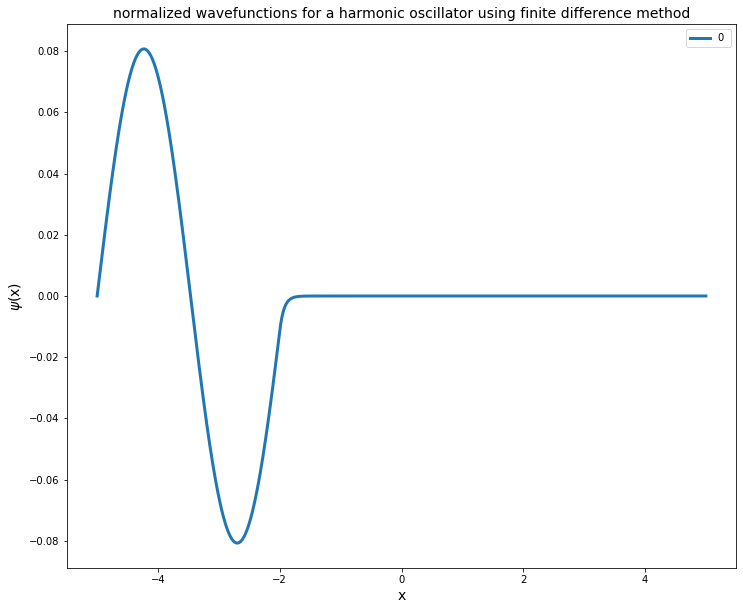

In [27]:
plt.figure(figsize=(12,10))
for i in range(len(z)):
    y = []
    y = np.append(y,vec[:,z[i]])
    y = np.append(y,0)
    y = np.insert(y,0,0)
    plt.plot(x,y,lw=3, label="{} ".format(i))
    plt.xlabel('x', size=14)
    plt.ylabel('$\psi$(x)',size=14)
plt.legend()
plt.title('normalized wavefunctions for a harmonic oscillator using finite difference method',size=14)
plt.show()